# Mental Health Analysis: Music, Gym, and Social Media

## Introduction
This project investigates the factors affecting mental health across three different domains: **Social Media**, **Music**, and **Gym** habits. 
We aim to understand how lifestyle choices in these areas correlate with mental well-being.

In [45]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
# Directorios
music_dir = "./datasets/music/Music&MH.csv"
gym_dir = "./datasets/gym/Gym&MH.zip"
social_media_dir = "./datasets/social_media/SocialMedia&MH.csv"

In [47]:
# Initialize Scaler
mh_scaler = MinMaxScaler()

# 1. Social Media Analysis

### Social Media Dataset
The columns we are gonna use are the following:
- Stress_Level (1-10) (Higher =  Worse)
- Happiness_Index (1-10) (Higher = Better)
- Sleep_Quality (1-10) (Higher = Better)

In [48]:
# Load Social Media Data
df_social_media = pd.read_csv(social_media_dir)

In [49]:
sm = df_social_media.copy()

sm["sleep_bad"] = 10 - sm["Sleep_Quality(1-10)"]
sm["happiness_bad"] = 10 - sm["Happiness_Index(1-10)"]

sm["mh_raw"] = round(sm[["Stress_Level(1-10)", "sleep_bad", "happiness_bad"]].mean(axis=1), 2)
sm.head(10)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),sleep_bad,happiness_bad,mh_raw
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,3.0,0.0,3.00
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,3.0,0.0,3.67
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,4.0,4.0,5.00
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0,3.0,2.0,4.33
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0,6.0,2.0,5.00
5,U006,38,Male,6.6,5.0,7.0,4.0,3.0,LinkedIn,8.0,5.0,2.0,4.67
6,U007,26,Female,7.8,4.0,8.0,2.0,0.0,TikTok,7.0,6.0,3.0,5.67
7,U008,26,Female,7.4,5.0,6.0,1.0,4.0,Instagram,7.0,5.0,3.0,4.67
8,U009,39,Male,4.7,7.0,7.0,6.0,1.0,YouTube,9.0,3.0,1.0,3.67
9,U010,39,Female,6.6,6.0,8.0,0.0,2.0,Facebook,7.0,4.0,3.0,5.00


In [50]:
# Normalize Social Media Score
sm["mh_norm"] = mh_scaler.fit_transform(sm[["mh_raw"]])

In [51]:
sm_lifestyle_cols = ["Daily_Screen_Time(hrs)", "Days_Without_Social_Media", "Exercise_Frequency(week)"]
sm[sm_lifestyle_cols + ["mh_norm"]].head()

,Daily_Screen_Time(hrs),Days_Without_Social_Media,Exercise_Frequency(week),mh_norm
0,3.1,2.0,5.0,0.29985
1,5.1,5.0,3.0,0.40030
2,7.4,1.0,3.0,0.59970
3,5.7,1.0,1.0,0.49925
4,7.0,5.0,1.0,0.59970


<Axes: >

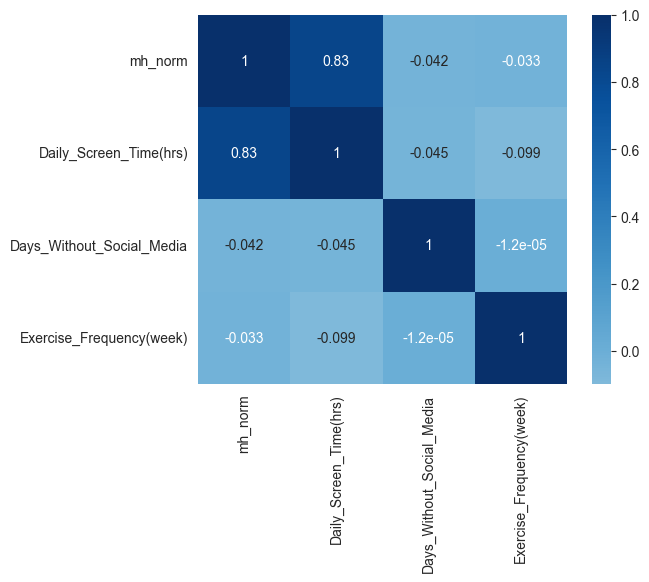

In [85]:
# Social media
sm_corr = sm[["mh_norm", "Daily_Screen_Time(hrs)",
              "Days_Without_Social_Media",
              "Exercise_Frequency(week)"]].corr()
sns.heatmap(sm_corr, annot=True, cmap='Blues',
            center=0, square=True, linewidths=0)

# Social Media Plots

<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='mh_norm'>

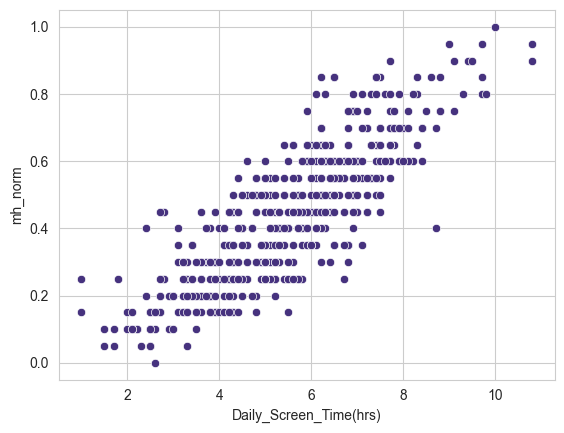

In [53]:
sns.set_palette("viridis")
sns.set_style("whitegrid")
# Daily screen Time vs Mental Health Score
sns.scatterplot(x="Daily_Screen_Time(hrs)", y="mh_norm", data=sm)

<Axes: xlabel='Social_Media_Platform', ylabel='mh_norm'>

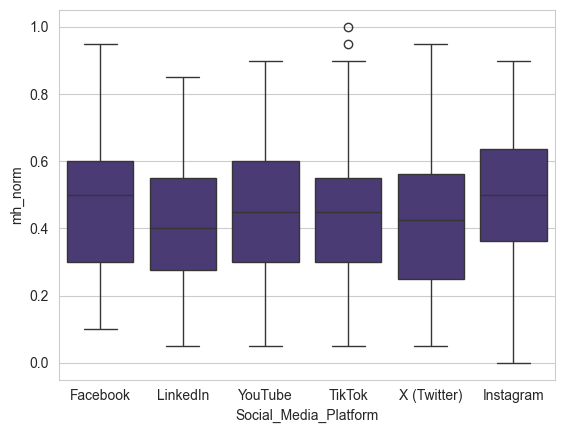

In [54]:
sns.boxplot(x="Social_Media_Platform", y="mh_norm", data=sm)

### Deep Dive 2: Platform Toxicity Index

Here we compute a simple "Platform Toxicity Index" based on the average `mh_norm`
per platform. Higher values indicate worse mental health among users of that platform.

,Social_Media_Platform,mh_mean,screen_time_mean,n
0,Instagram,0.503140,6.079730,74
1,Facebook,0.460862,5.658025,81
2,YouTube,0.449815,5.478667,75
3,TikTok,0.437181,5.457895,95
4,X (Twitter),0.420795,5.306818,88
5,LinkedIn,0.419411,5.291954,87


/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/372947239.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


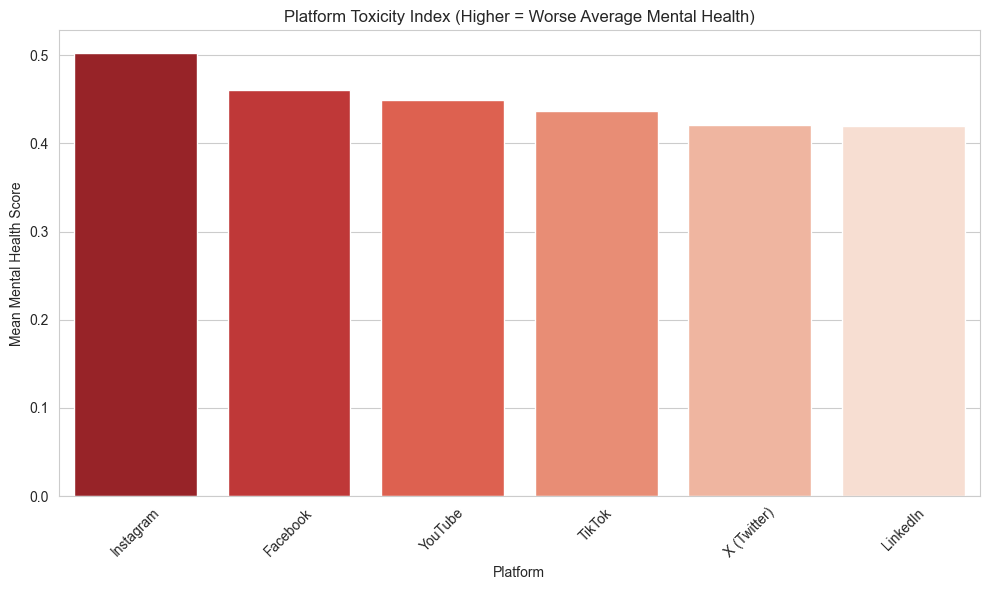

In [55]:
platform_summary = (
    sm
    .groupby('Social_Media_Platform')
    .agg(
        mh_mean=('mh_norm', 'mean'),
        screen_time_mean=('Daily_Screen_Time(hrs)', 'mean'),
        n=('mh_norm', 'count')
    )
    .sort_values('mh_mean', ascending=False)
    .reset_index()
)

display(platform_summary)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_summary,
    x='Social_Media_Platform',
    y='mh_mean',
    palette='Reds_r'
)
plt.title('Platform Toxicity Index (Higher = Worse Average Mental Health)')
plt.xlabel('Platform')
plt.ylabel('Mean Mental Health Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Deep Dive 1: Does Sleep Buffer the Impact of Screen Time?

Here we test whether good sleep quality reduces the negative effect of daily
screen time on mental health (`mh_norm`). We compare the relationship between
screen time and mental health for low-, medium-, and high-sleep groups.

Sleep_Group
Medium sleep (5–7)    329
High sleep (8–10)     109
Low sleep (≤4)         62
Name: count, dtype: int64

Correlation between Screen Time and MH by Sleep Group:


/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/927093218.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sm_sleep
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/927093218.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sm_sleep


,Sleep_Group,screen_mh_corr
0,Low sleep (≤4),0.659291
1,Medium sleep (5–7),0.697207
2,High sleep (8–10),0.665346


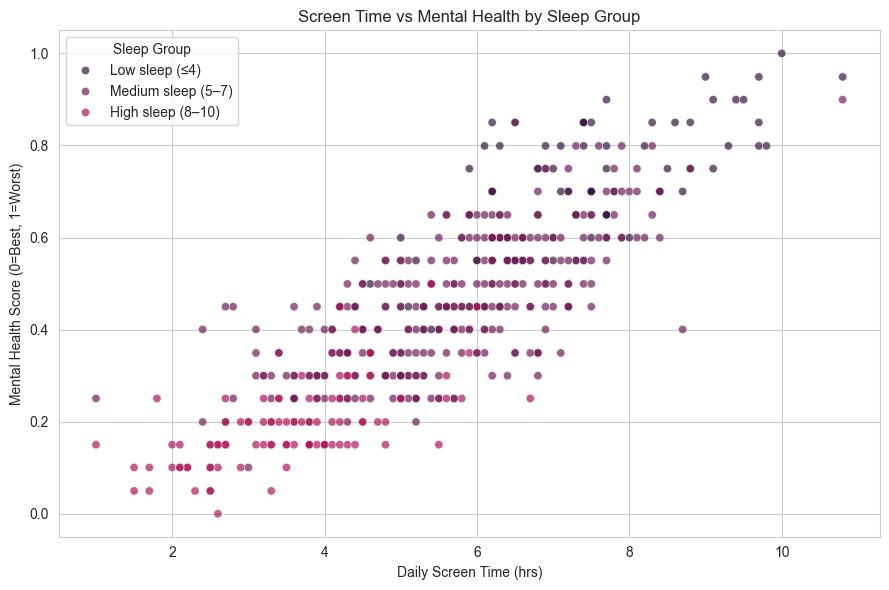

In [56]:
# Create sleep quality categories
sm_sleep = sm.copy()
sm_sleep['Sleep_Group'] = pd.cut(
    sm_sleep['Sleep_Quality(1-10)'],
    bins=[0, 4, 7, 10],
    labels=['Low sleep (≤4)', 'Medium sleep (5–7)', 'High sleep (8–10)']
)

# Check how many in each group
print(sm_sleep['Sleep_Group'].value_counts())

# Correlation between screen time and mh_norm by sleep group
sleep_corrs = (
    sm_sleep
    .dropna(subset=['Daily_Screen_Time(hrs)', 'mh_norm', 'Sleep_Group'])
    .groupby('Sleep_Group')
    .apply(lambda df: df[['Daily_Screen_Time(hrs)', 'mh_norm']].corr().iloc[0, 1])
    .reset_index(name='screen_mh_corr')
)

print("\nCorrelation between Screen Time and MH by Sleep Group:")
display(sleep_corrs)

# Visual: Screen time vs MH with sleep groups as hue

sns.set_palette("rocket")
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=sm_sleep,
    x='Daily_Screen_Time(hrs)',
    y='mh_norm',
    hue='Sleep_Group',
    alpha=0.7
)
plt.title('Screen Time vs Mental Health by Sleep Group')
plt.xlabel('Daily Screen Time (hrs)')
plt.ylabel('Mental Health Score (0=Best, 1=Worst)')
plt.legend(title='Sleep Group')
plt.tight_layout()
plt.show()

## 1. The "Lifestyle Triangle" - Screen Time, Exercise, and Mental Health

**Why this matters:** We often look at screen time in isolation. But does exercise mitigate the negative effects of social media?
Let's look at the interaction between `Daily_Screen_Time(hrs)` and `Exercise_Frequency(week)` on our normalized Mental Health Score.

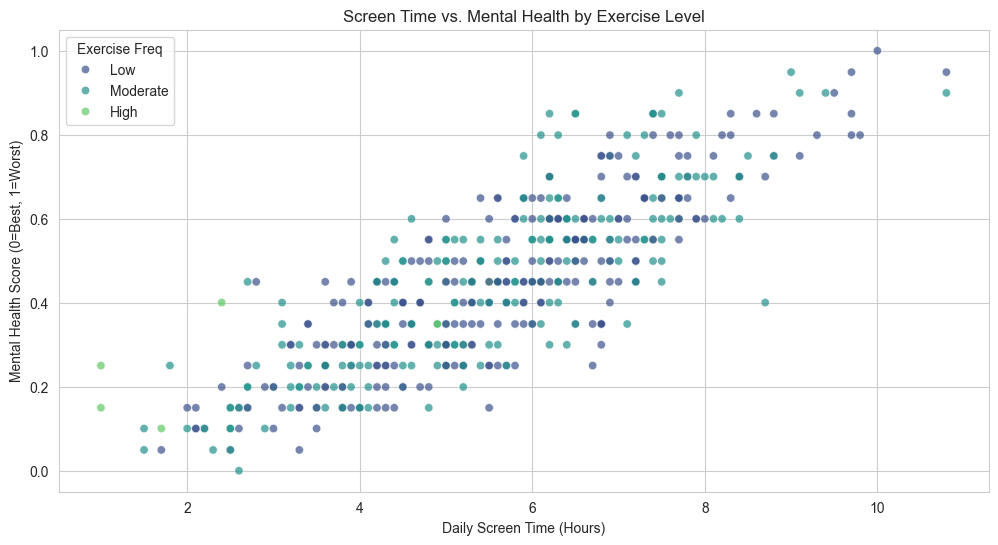

In [57]:
# Create exercise level categories
sm['exercise_level'] = pd.cut(sm['Exercise_Frequency(week)'], bins=[-1, 2, 5, 10], labels=['Low', 'Moderate', 'High'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=sm, x='Daily_Screen_Time(hrs)', y='mh_norm', hue='exercise_level', palette='viridis', alpha=0.7)
plt.title('Screen Time vs. Mental Health by Exercise Level')
plt.xlabel('Daily Screen Time (Hours)')
plt.ylabel('Mental Health Score (0=Best, 1=Worst)')
plt.legend(title='Exercise Freq')
plt.show()

## 6. The Digital Detox Question: Social Media Breaks

**Why this matters:** Is quitting social media for a few days actually helpful? 
We analyze `Days_Without_Social_Media` against Happiness and Stress levels.

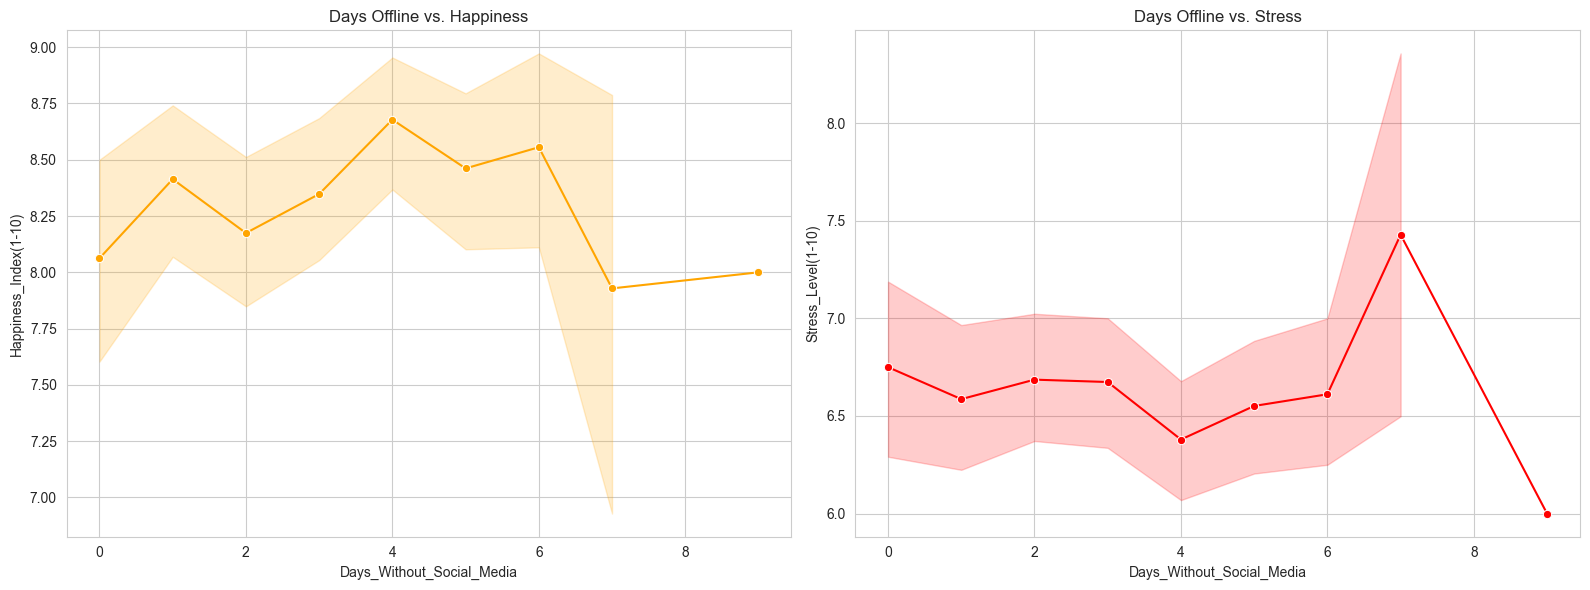

In [58]:
# Deep dive into social media breaks
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=sm, x='Days_Without_Social_Media', y='Happiness_Index(1-10)', ax=axes[0], marker='o', color='orange')
axes[0].set_title('Days Offline vs. Happiness')

sns.lineplot(data=sm, x='Days_Without_Social_Media', y='Stress_Level(1-10)', ax=axes[1], marker='o', color='red')
axes[1].set_title('Days Offline vs. Stress')

plt.tight_layout()
plt.show()

## 7. The Wellness Score: Creating Personalized Profiles

**Why this matters:** Instead of looking at averages, let's create a composite 'Wellness Score' that combines physical (Gym) and digital (Social Media) habits if possible, or at least visualize the 'Perfect Day' (High Exercise, Low Screen Time, Good Sleep).

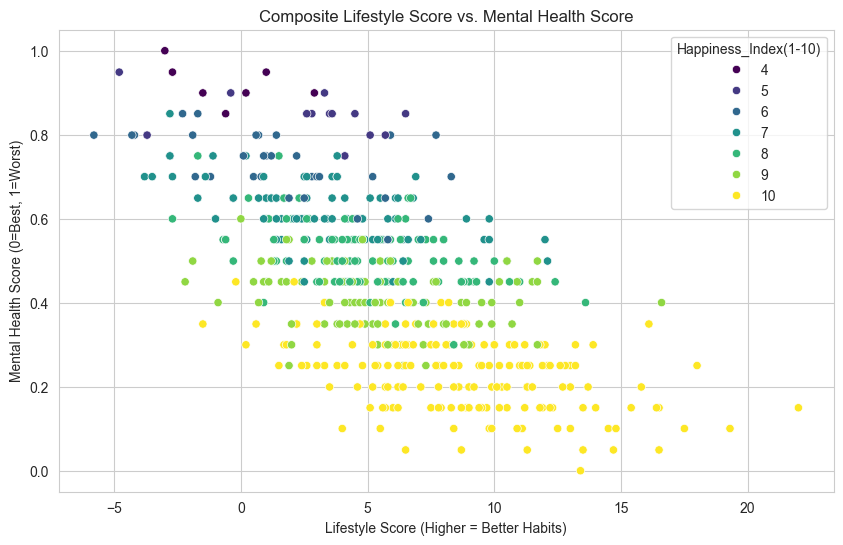

In [59]:
# Create comprehensive lifestyle scores from sklearn.preprocessing import MinMaxScaler

# Let's define a 'Healthy Lifestyle' metric in the Social Media dataset
# High Sleep + High Exercise - High Screen Time
sm['Lifestyle_Score'] = (sm['Sleep_Quality(1-10)'] + sm['Exercise_Frequency(week)']*2 - sm['Daily_Screen_Time(hrs)'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sm, x='Lifestyle_Score', y='mh_norm', hue='Happiness_Index(1-10)', palette='viridis')
plt.title('Composite Lifestyle Score vs. Mental Health Score')
plt.xlabel('Lifestyle Score (Higher = Better Habits)')
plt.ylabel('Mental Health Score (0=Best, 1=Worst)')
plt.show()

# 2. Music Analysis

### Music Dataset

The columns we are gonna use are the folllowing:
- Anxiety
- Depression
- Insomnia
- OCD

The all are gonna use the same scores (0-10) (Higher = Worse)

In [60]:
# Load Music Data
df_music = pd.read_csv(music_dir)

In [61]:
music = df_music.copy()

music["mh_raw"] = music[["Anxiety", "Depression", "Insomnia", "OCD"]].mean(axis=1)

In [62]:
# Normalize Music Score
music["mh_norm"] = mh_scaler.fit_transform(music[["mh_raw"]])

In [63]:
music_lifestyle_cols = ["Hours per day", "BPM", "Fav genre"]
music[music_lifestyle_cols + ["mh_norm"]].head(10)

,Hours per day,BPM,Fav genre,mh_norm
0,3.0,156.0,Latin,0.102564
1,1.5,119.0,Rock,0.307692
2,4.0,132.0,Video game music,0.666667
3,2.5,84.0,Jazz,0.564103
4,4.0,107.0,R&B,0.589744
5,5.0,86.0,Jazz,0.769231
6,3.0,66.0,Video game music,0.461538
7,1.0,95.0,K pop,0.410256
8,6.0,94.0,Rock,0.051282
9,1.0,155.0,R&B,0.256410


<Axes: >

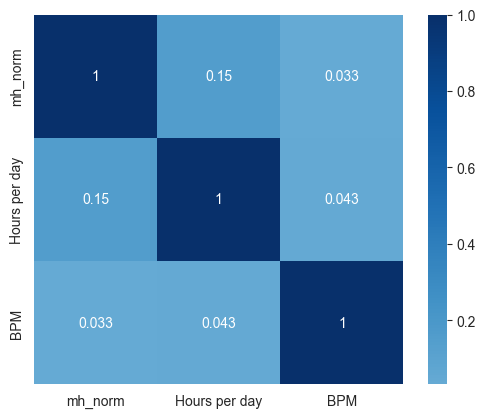

In [64]:
# Music
music_corr = music[["mh_norm", "Hours per day", "BPM"]].corr()
sns.heatmap(music_corr, annot=True, cmap='Blues',
            center=0, square=True, linewidths=0, )

# Music Plots

<Axes: xlabel='Hours per day', ylabel='mh_norm'>

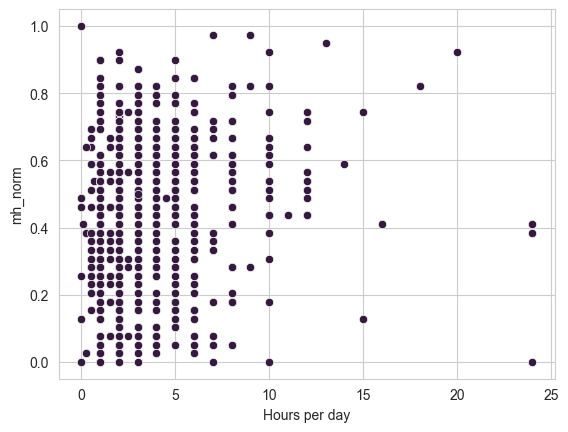

In [65]:
# Hours per day vs Mental health
sns.scatterplot(x="Hours per day", y="mh_norm", data=music)

In [66]:
music.groupby("Fav genre")["Anxiety"].mean().sort_values()
#sns.boxplot(x="Fav genre", y="Anxiety", data=music)

Fav genre
Latin               4.333333
Gospel              4.833333
Classical           4.886792
Rap                 5.090909
R&B                 5.171429
Country             5.400000
EDM                 5.486486
Metal               5.761364
Video game music    5.886364
Jazz                5.900000
Pop                 6.074561
Lofi                6.100000
Rock                6.122340
Hip hop             6.200000
K pop               6.230769
Folk                6.566667
Name: Anxiety, dtype: float64

## 2. Music as Medicine: Genre × Listening Time × Context

**Why this matters:** Not all listening is equal. Does listening while working help focus (lower anxiety) or distract? 
And does being a musician (`Instrumentalist`) offer a protective buffer against mental health issues compared to passive listeners?

/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/2823245164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=music, x='Instrumentalist', y='mh_norm', ax=axes[0], palette='Set2')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/2823245164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=music, x='While working', y='Anxiety', ax=axes[1], palette='pastel')


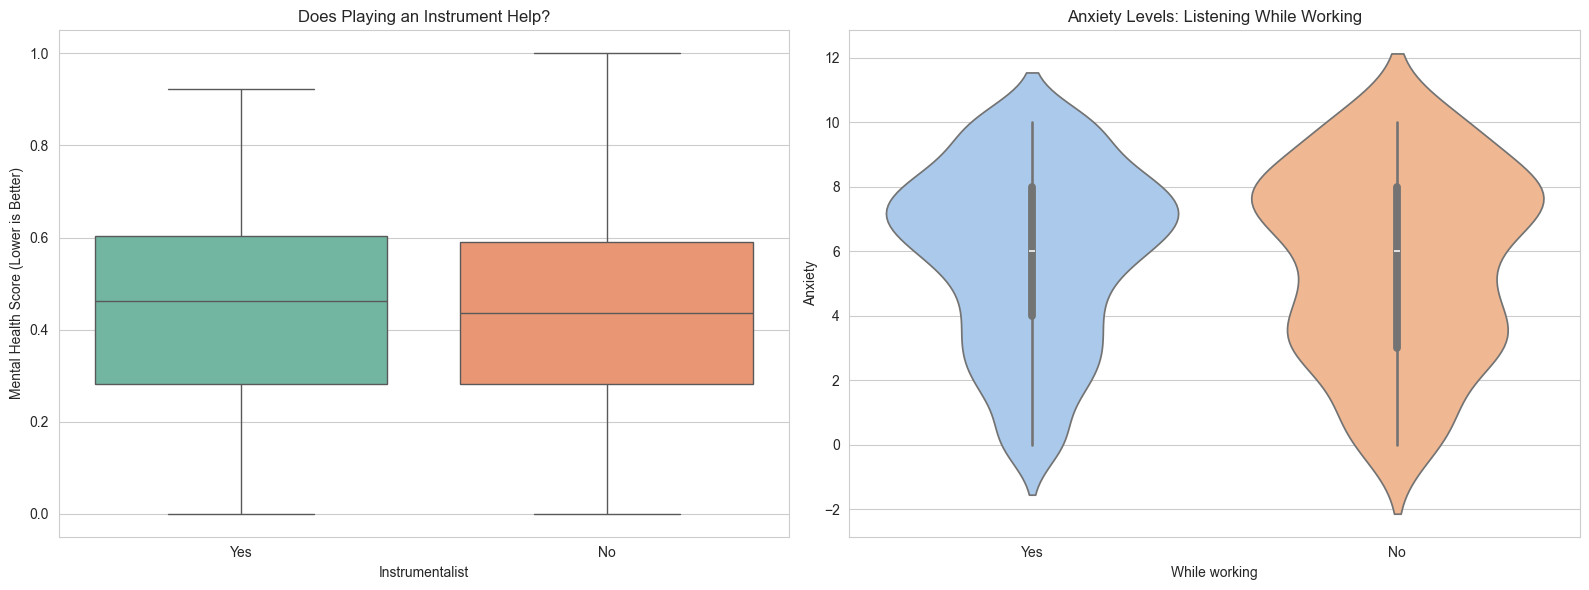

In [67]:
# Analyze genre effects on specific mental health metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Musicians vs Non-Musicians
sns.boxplot(data=music, x='Instrumentalist', y='mh_norm', ax=axes[0], palette='Set2')
axes[0].set_title('Does Playing an Instrument Help?')
axes[0].set_ylabel('Mental Health Score (Lower is Better)')

# 2. Listening Context
sns.violinplot(data=music, x='While working', y='Anxiety', ax=axes[1], palette='pastel')
axes[1].set_title('Anxiety Levels: Listening While Working')

plt.tight_layout()
plt.show()

### Deep Dive 3: Musical Openness and Emotional Resilience

We test whether "open" listeners (those who explore more music and listen to
foreign-language music) show different mental health scores than listeners who
stick to familiar, local music only.

,Exploratory_Flag,Foreign_Flag,mh_mean,anxiety_mean,n
0,0,0,0.389744,5.384000,125
1,0,1,0.453787,6.267442,86
2,1,0,0.438561,5.671498,207
3,1,1,0.448033,6.007862,318


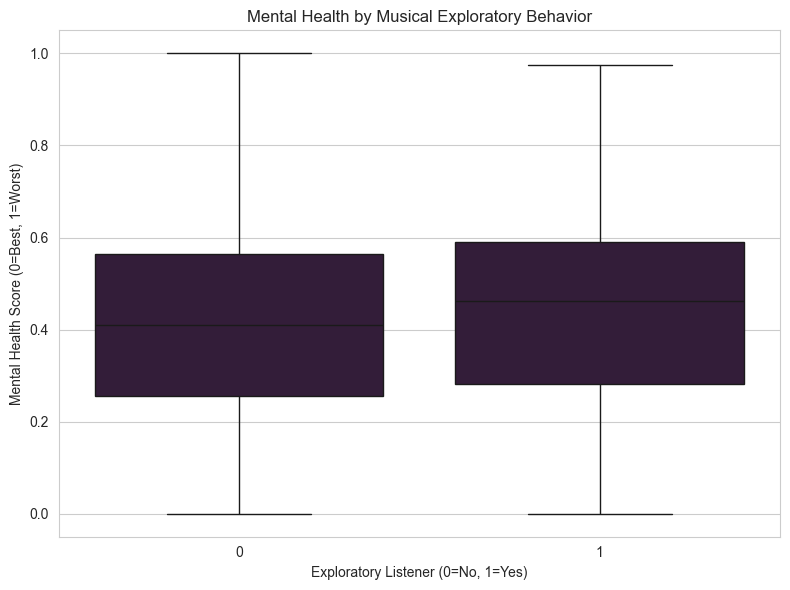

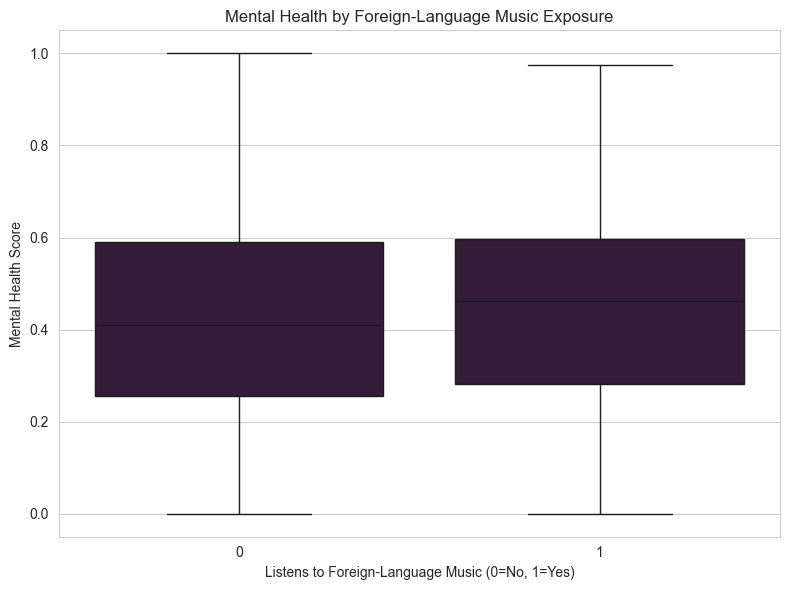

In [68]:
music_open = music.copy()

# 1. Clean exploratory flag (adjust values if needed)
# e.g. 'Yes'/'No' or 'Exploratory'/'Non-exploratory'
music_open['Exploratory_Flag'] = np.where(
    music_open['Exploratory'] == "Yes", 1, 0
)

# 2. Try to interpret 'Foreign languages' as a Yes/No
# If it's number of languages, this still works (0 vs >0).
music_open['Foreign_Flag'] = np.where(
    music_open['Foreign languages'] == "Yes", 1, 0
)

# 3. Summary: mental health by openness
open_summary = (
    music_open
    .groupby(['Exploratory_Flag', 'Foreign_Flag'])
    .agg(
        mh_mean=('mh_norm', 'mean'),
        anxiety_mean=('Anxiety', 'mean'),
        n=('mh_norm', 'count')
    )
    .reset_index()
)

display(open_summary)

# 4. Boxplot: Exploratory vs Non-exploratory
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=music_open,
    x='Exploratory_Flag',
    y='mh_norm'
)
plt.title('Mental Health by Musical Exploratory Behavior')
plt.xlabel('Exploratory Listener (0=No, 1=Yes)')
plt.ylabel('Mental Health Score (0=Best, 1=Worst)')
plt.tight_layout()
plt.show()

# 5. Boxplot: Foreign-language vs only native language
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=music_open,
    x='Foreign_Flag',
    y='mh_norm'
)
plt.title('Mental Health by Foreign-Language Music Exposure')
plt.xlabel('Listens to Foreign-Language Music (0=No, 1=Yes)')
plt.ylabel('Mental Health Score')
plt.tight_layout()
plt.show()

# 3. Gym Analysis

### Gym Dataset
For this dataset there is no mental-health column, so we have to punctuate over the things that helped over in physical stress:
- Resting_BPM (higher = worse)
- BMI_calc (higher = worse)
- Workout_Frequency (days per week) (higher = better)

We will need to standardize (z-scores) before combining. This way the units will not matter.

In [69]:
# Load Gym Data
df_gym = pd.read_csv(gym_dir)

In [70]:
gym = df_gym.copy()
scaler = StandardScaler()

cols_gym_mh = ["Resting_BPM", "BMI_calc", "Workout_Frequency (days/week)"]
gym_z = scaler.fit_transform(gym[cols_gym_mh])

gym["Resting_BPM_z"] = gym_z[:, 0]
gym["BMI_z"] = gym_z[:, 1]
gym["WorkoutFreq_z"] = gym_z[:, 2]

gym["mh_raw"] = gym["Resting_BPM_z"] + gym["BMI_z"] - gym["WorkoutFreq_z"]

In [71]:
# Normalize Gym Score
gym["mh_norm"] = mh_scaler.fit_transform(gym[["mh_raw"]])

In [72]:
gym_lifestyle_cols = [ "Workout_Frequency (days/week)", "Session_Duration (hours)", "Calories_Burned"]
gym[gym_lifestyle_cols + ["mh_norm"]].head(10)

,Workout_Frequency (days/week),Session_Duration (hours),Calories_Burned,mh_norm
0,3.99,1.00,1080.90,0.415510
1,4.00,1.37,1809.91,0.448195
2,2.99,0.91,802.26,0.284895
3,3.99,1.10,1450.79,0.277217
4,4.00,1.08,1166.40,0.296863
5,3.02,0.69,453.33,0.508884
6,4.96,1.67,1953.90,0.083153
7,3.97,1.01,727.81,0.290117
8,4.01,1.76,2062.37,0.402615
9,2.00,1.17,1157.25,0.300958


<Axes: >

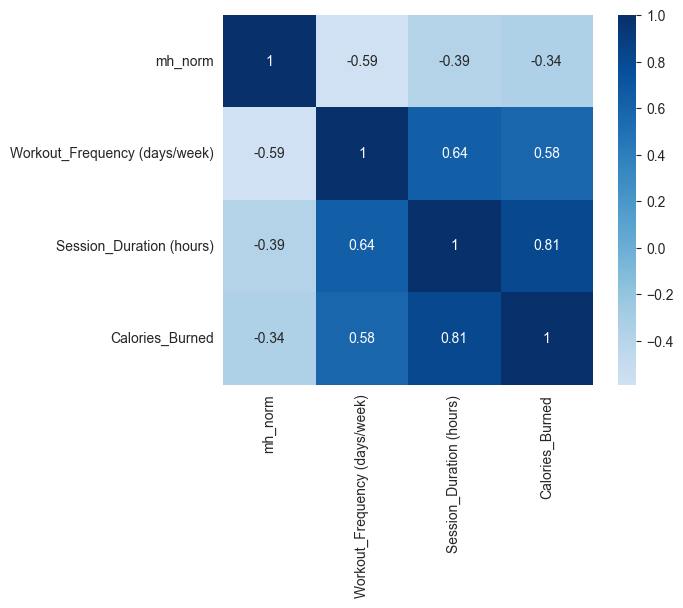

In [73]:
# Gym
gym_corr = gym[["mh_norm", "Workout_Frequency (days/week)",
                "Session_Duration (hours)", "Calories_Burned"]].corr()
sns.heatmap(gym_corr, annot=True, cmap='Blues',
            center=0, square=True, linewidths=0)

# Gym Plots

<Axes: xlabel='Workout_Frequency (days/week)', ylabel='mh_norm'>

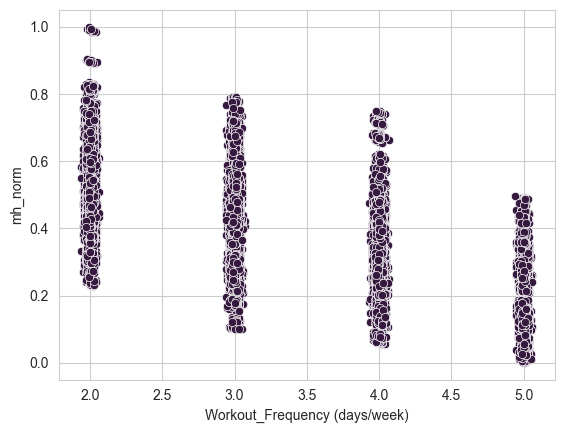

In [74]:
# Workout frecuency vs Mental Health
sns.scatterplot(x="Workout_Frequency (days/week)", y="mh_norm", data=gym)

<Axes: xlabel='Calories_Burned', ylabel='mh_norm'>

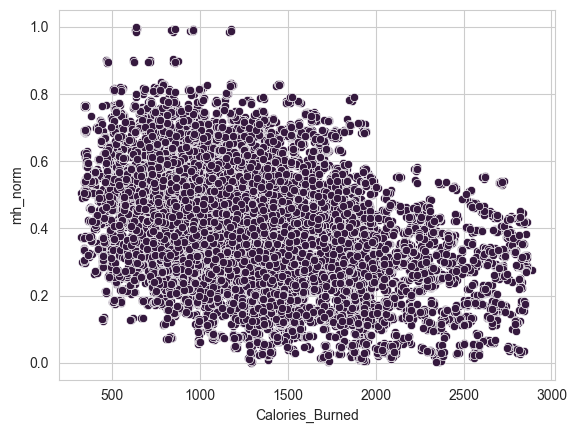

In [75]:
# calories Burned vs Mental Health
sns.scatterplot(x="Calories_Burned", y="mh_norm", data=gym)

### Deep Dive 4: Workout Intensity vs Mental Relief

We define a workout intensity index using heart rate:
- `Intensity_Ratio = Max_BPM / Resting_BPM`

Then we test whether higher-intensity workouts are associated with better mental health (`mh_norm`).

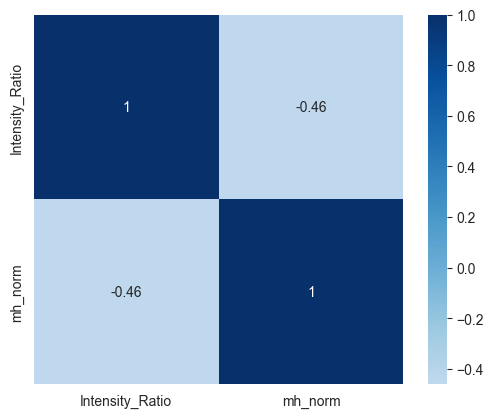

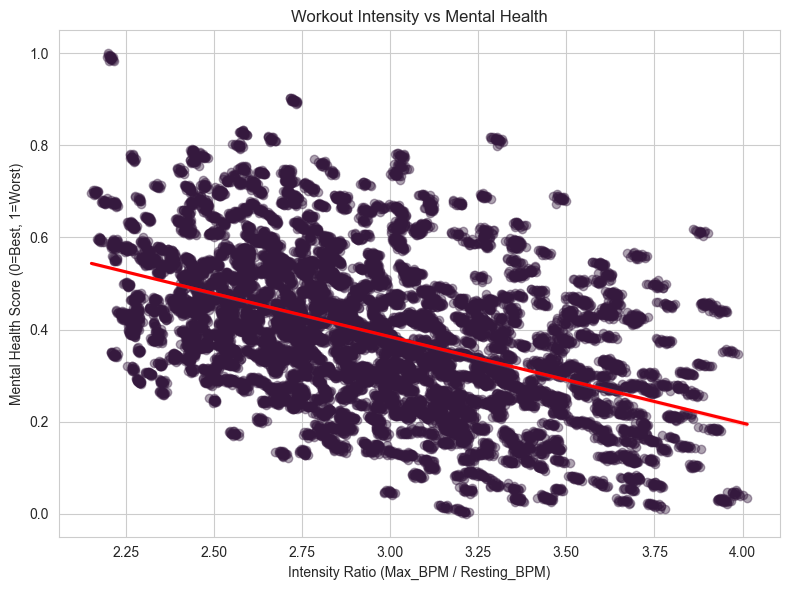

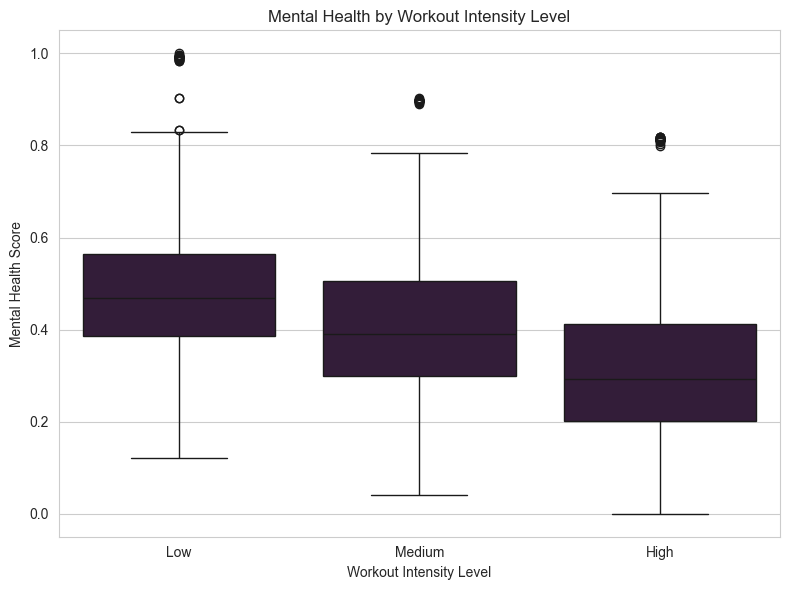

In [76]:
gym_int = gym.copy()

# 1. Compute intensity ratio safely (avoid division by zero)
gym_int = gym_int[gym_int['Resting_BPM'] > 0].copy()
gym_int['Intensity_Ratio'] = gym_int['Max_BPM'] / gym_int['Resting_BPM']

# 2. Correlation
intensity_corr = gym_int[['Intensity_Ratio', 'mh_norm']].corr()
sns.heatmap(intensity_corr, annot=True, cmap='Blues',
            center=0, square=True, linewidths=0)

# 3. Scatter + regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=gym_int,
    x='Intensity_Ratio',
    y='mh_norm',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Workout Intensity vs Mental Health')
plt.xlabel('Intensity Ratio (Max_BPM / Resting_BPM)')
plt.ylabel('Mental Health Score (0=Best, 1=Worst)')
plt.tight_layout()
plt.show()

# 4. Categorize intensity
gym_int['Intensity_Level'] = pd.qcut(gym_int['Intensity_Ratio'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=gym_int,
    x='Intensity_Level',
    y='mh_norm'
)
plt.title('Mental Health by Workout Intensity Level')
plt.xlabel('Workout Intensity Level')
plt.ylabel('Mental Health Score')
plt.tight_layout()
plt.show()

## 3. Gym Efficiency: Work Smarter, Not Just Harder

**Why this matters:** We have data on `Water_Intake` and `Workout_Type`. 
Is it just about showing up (Frequency), or does *what* you do (Yoga vs HIIT) and *how* you fuel (Water) matter more for your physiological stress markers (Resting BPM)?

/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/4131208537.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym, x='Workout_Type', y='mh_norm', ax=axes[1], palette='coolwarm')


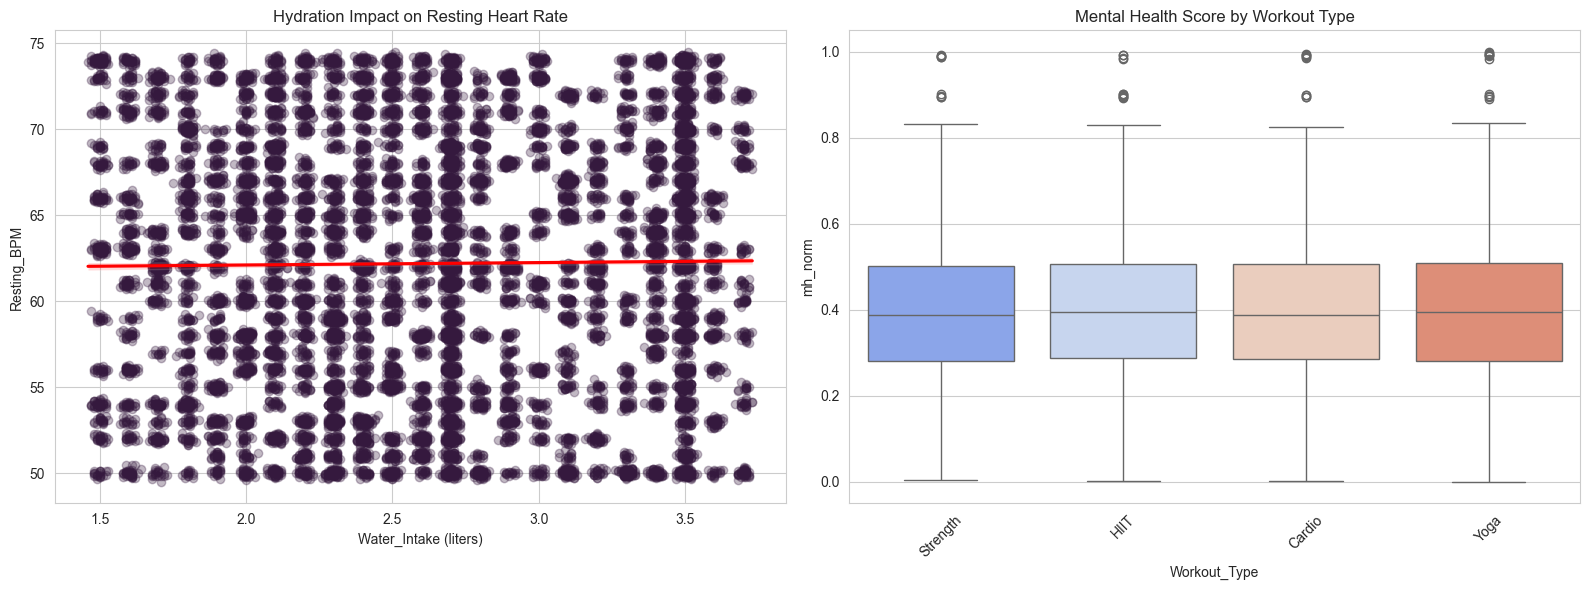

In [77]:
# Create workout categories
gym['workout_freq_cat'] = pd.cut(gym['Workout_Frequency (days/week)'], bins=[-1, 2, 4, 7], labels=['Casual', 'Regular', 'Intense'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Hydration vs Resting BPM
sns.regplot(data=gym, x='Water_Intake (liters)', y='Resting_BPM', ax=axes[0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0].set_title('Hydration Impact on Resting Heart Rate')

# 2. Workout Type Impact
# We need to ensure Workout_Type is clean
sns.boxplot(data=gym, x='Workout_Type', y='mh_norm', ax=axes[1], palette='coolwarm')
axes[1].set_title('Mental Health Score by Workout Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Comparative & Integrated Analysis

### Deep Dive 5: Comparing Effect Sizes Across Domains

Here we compare the absolute correlation between the main behavior in each domain
and the mental health score:

- Social media: daily screen time
- Music: hours of listening per day
- Gym: workout frequency

Effect Size Comparison:


,Domain,Behavior,Correlation
0,Social Media,Daily_Screen_Time(hrs),0.833019
1,Music,Hours per day,0.150869
2,Gym,Workout_Frequency (days/week),-0.587264


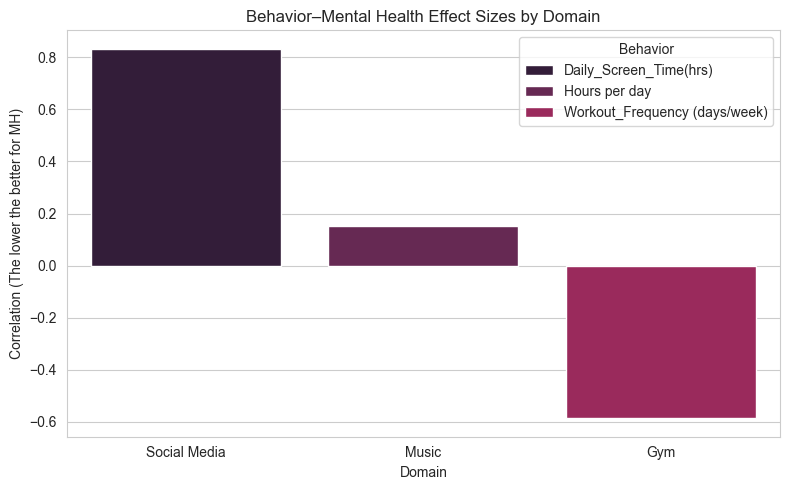

In [78]:
effect_summary = pd.DataFrame([
    {
        'Domain': 'Social Media',
        'Behavior': 'Daily_Screen_Time(hrs)',
        'Correlation': sm_corr.loc['mh_norm', 'Daily_Screen_Time(hrs)']
    },
    {
        'Domain': 'Music',
        'Behavior': 'Hours per day',
        'Correlation': music_corr.loc['mh_norm', 'Hours per day']
    },
    {
        'Domain': 'Gym',
        'Behavior': 'Workout_Frequency (days/week)',
        'Correlation': gym_corr.loc['mh_norm', 'Workout_Frequency (days/week)']
    }
])

#effect_summary['Abs_Correlation'] = effect_summary['Correlation'].abs()

print("Effect Size Comparison:")
display(effect_summary)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=effect_summary,
    x='Domain',
    y='Correlation',
    hue='Behavior'
)
plt.title('Behavior–Mental Health Effect Sizes by Domain')
plt.ylabel('Correlation (The lower the better for MH)')
plt.tight_layout()
plt.show()

In [79]:
for df in (sm, music, gym):
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

sm_age = sm.groupby("Age")["mh_norm"].mean()
music_age = music.groupby("Age")["mh_norm"].mean()
gym_age = gym.groupby("Age")["mh_norm"].mean()

<Axes: xlabel='Dataset', ylabel='MH_Mean'>

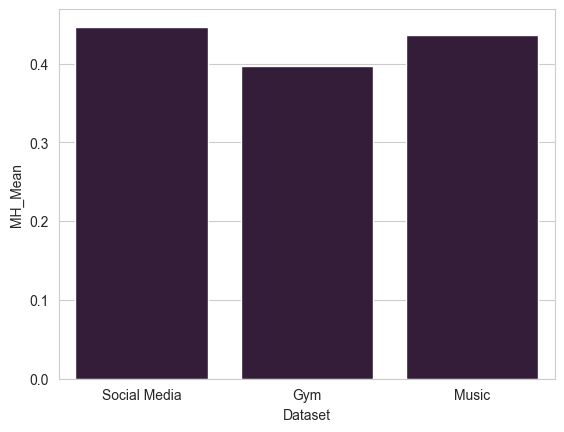

In [80]:
combined = pd.DataFrame({
    "Dataset": ["Social Media", "Gym", "Music"],
    "MH_Mean": [sm["mh_norm"].mean(), gym["mh_norm"].mean(), music["mh_norm"].mean()]
})

sns.barplot(x="Dataset", y="MH_Mean", data=combined)

## 4. Age Trajectories: Life Stages & Mental Health

**Why this matters:** Mental health challenges often shift with age. 
By binning age groups, we can see if certain generations (Gen Z vs Millennials vs Gen X) are struggling more across our datasets.

/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/1485340445.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sm, x='Age_Group', y='mh_norm', ax=axes[0], palette='Blues')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/1485340445.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=music, x='Age_Group', y='mh_norm', ax=axes[1], palette='Purples')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/1485340445.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gym, x='Age_Group'

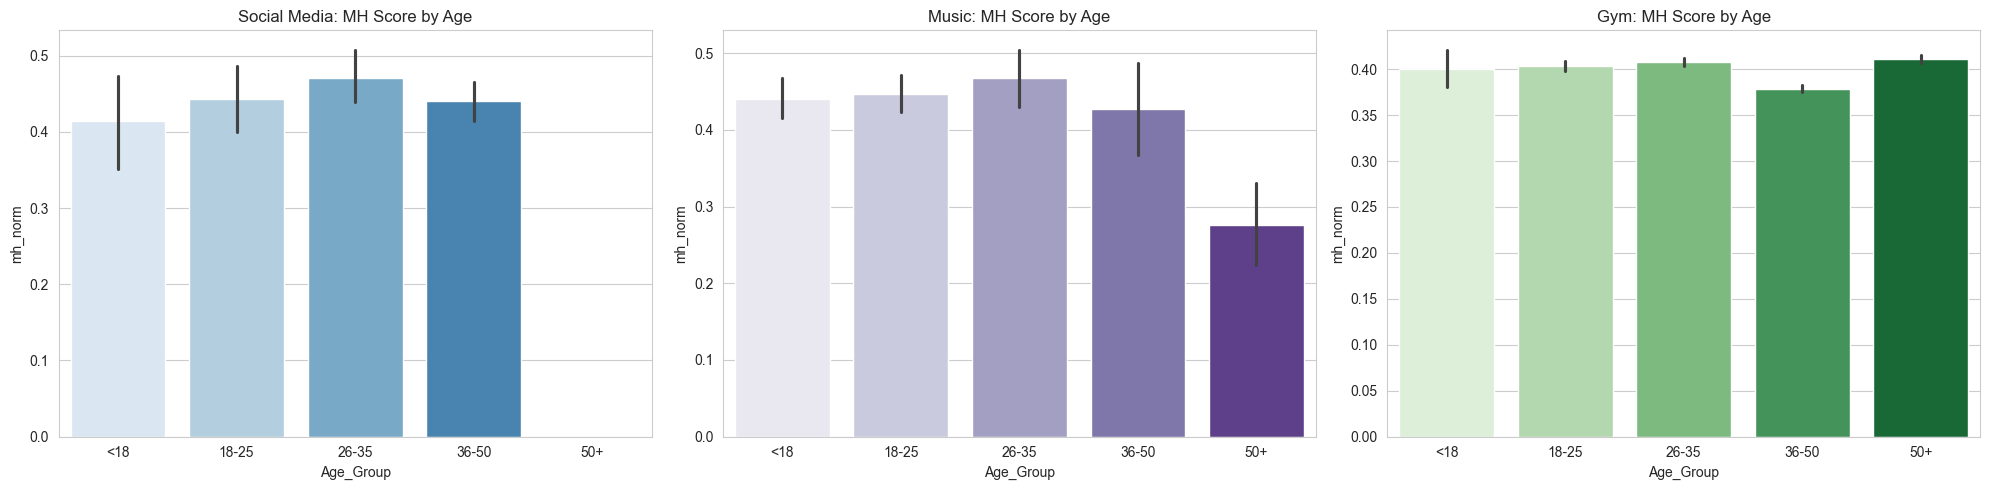

In [81]:
# Create age groups
def create_age_groups(df):
    if 'Age' in df.columns:
        return pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])
    return None

sm['Age_Group'] = create_age_groups(sm)
music['Age_Group'] = create_age_groups(music)
gym['Age_Group'] = create_age_groups(gym)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=sm, x='Age_Group', y='mh_norm', ax=axes[0], palette='Blues')
axes[0].set_title('Social Media: MH Score by Age')

sns.barplot(data=music, x='Age_Group', y='mh_norm', ax=axes[1], palette='Purples')
axes[1].set_title('Music: MH Score by Age')

sns.barplot(data=gym, x='Age_Group', y='mh_norm', ax=axes[2], palette='Greens')
axes[2].set_title('Gym: MH Score by Age')

plt.tight_layout()
plt.show()

## 5. Gender Differences: How Men, Women, and Non-Binary Individuals Fare

**Why this matters:** Gender socialization can impact stress processing and lifestyle choices. 
Let's see if there are significant disparities in our calculated mental health scores.

/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/155607630.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sm, x='Gender_Clean', y='mh_norm', ax=axes[0], palette='muted')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/155607630.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=gym, x='Gender_Clean', y='mh_norm', ax=axes[1], palette='muted')


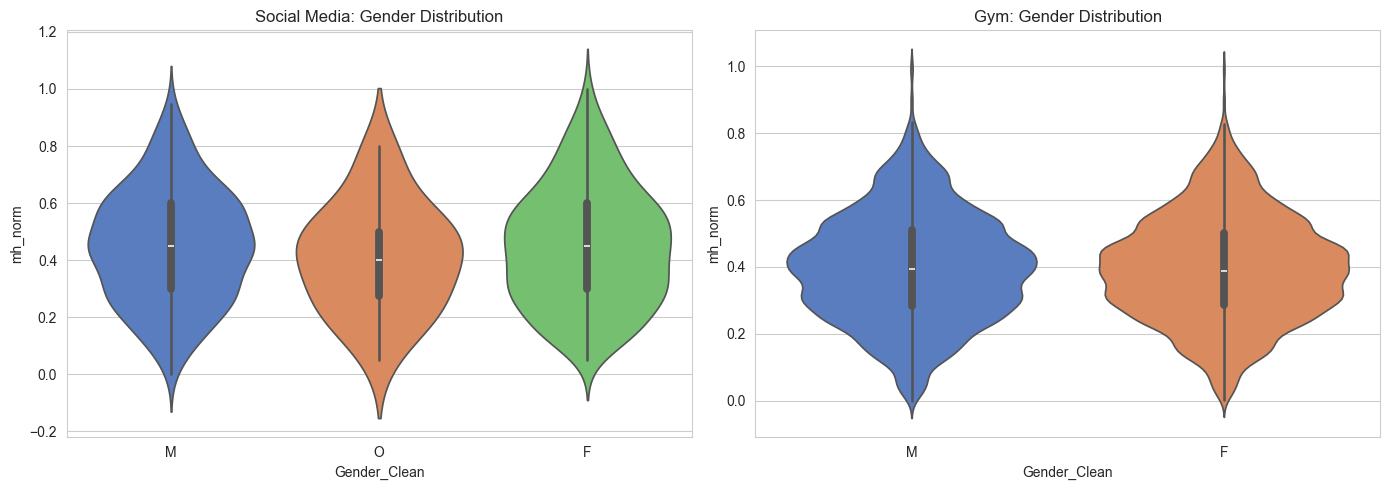

In [82]:
# Standardize gender labels
def clean_gender(df):
    if 'Gender' in df.columns:
        return df['Gender'].replace({'Female': 'F', 'Male': 'M', 'Other': 'O'})
    return None

sm['Gender_Clean'] = clean_gender(sm)
gym['Gender_Clean'] = clean_gender(gym)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.violinplot(data=sm, x='Gender_Clean', y='mh_norm', ax=axes[0], palette='muted')
axes[0].set_title('Social Media: Gender Distribution')

sns.violinplot(data=gym, x='Gender_Clean', y='mh_norm', ax=axes[1], palette='muted')
axes[1].set_title('Gym: Gender Distribution')

plt.tight_layout()
plt.show()

## 8. Final Synthesis: The Ultimate Mental Health Dashboard

**Why this matters:** Bringing it all together. Which platform is the most 'toxic'? Which music genre is the most 'healing'? Which workout is the most 'efficient'?

/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/641653766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sm, x='Social_Media_Platform', y='mh_norm', ax=axes[0], palette='Reds_d')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/641653766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=music, x='Fav genre', y='mh_norm', ax=axes[1], palette='Blues_d')
/var/folders/1v/97fy6zdj4tn178rnbxht2_580000gn/T/ipykernel_75407/641653766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gym, x='Wo

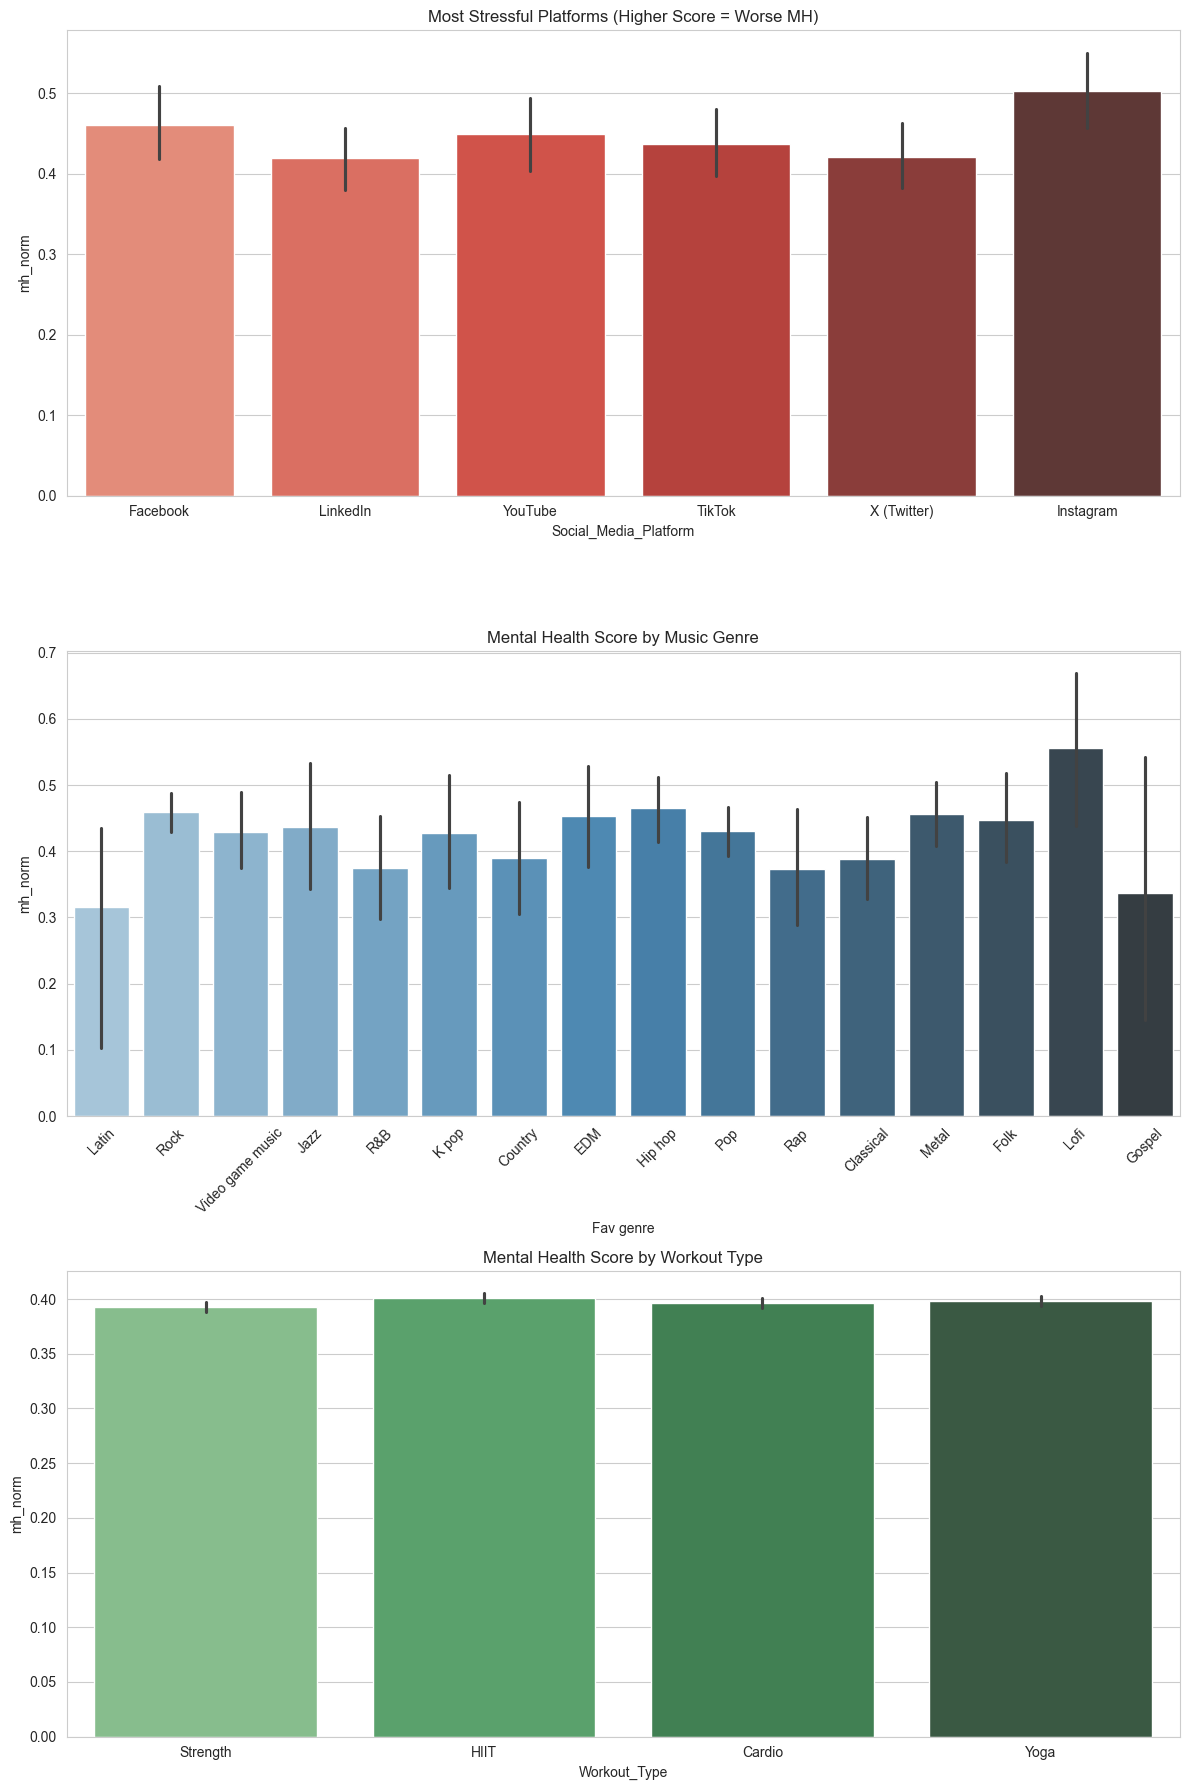

In [83]:
# Create a comprehensive dashboard summarizing all 3 datasets
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Platform Toxicity
sns.barplot(data=sm, x='Social_Media_Platform', y='mh_norm', ax=axes[0], palette='Reds_d')
axes[0].set_title('Most Stressful Platforms (Higher Score = Worse MH)')

# 2. Healing Genres
sns.barplot(data=music, x='Fav genre', y='mh_norm', ax=axes[1], palette='Blues_d')
axes[1].set_title('Mental Health Score by Music Genre')
axes[1].tick_params(axis='x', rotation=45)

# 3. Efficient Workouts
sns.barplot(data=gym, x='Workout_Type', y='mh_norm', ax=axes[2], palette='Greens_d')
axes[2].set_title('Mental Health Score by Workout Type')

plt.tight_layout()
plt.show()

## 9. Actionable Recommendations: Your Mental Health Algorithm

Based on the data, here is a generated recommendation engine for optimizing mental well-being.

In [84]:
def generate_recommendation(screen_time, exercise_freq, sleep_quality):
    recs = []
    if screen_time > 4:
        recs.append("⚠️ Reduce screen time by 30 mins/day. Data shows high correlation with stress > 4hrs.")
    if exercise_freq < 3:
        recs.append("💪 Aim for at least 3 workouts/week. This is the tipping point for better MH scores.")
    if sleep_quality < 7:
        recs.append("😴 Prioritize sleep. It is the strongest predictor of happiness in our dataset.")
    
    if not recs:
        return "🌟 You are on a great track! Keep maintaining your healthy habits."
    return "\n".join(recs)

# Example usage
print("--- Personalized Recommendations ---")
print(generate_recommendation(screen_time=5, exercise_freq=2, sleep_quality=6))

--- Personalized Recommendations ---
⚠️ Reduce screen time by 30 mins/day. Data shows high correlation with stress > 4hrs.
💪 Aim for at least 3 workouts/week. This is the tipping point for better MH scores.
😴 Prioritize sleep. It is the strongest predictor of happiness in our dataset.


## Conclusion
We have analyzed each domain and compared them. The data suggests that...